##Assignment 2

In [59]:
# importing framework
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df=pd.read_csv('/content/archive (1).zip')

In [5]:
df.shape

(20640, 10)

In [6]:
#first 5 rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
#filling missing values
df['total_bedrooms'].isna().sum()

207

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:

#string manipulation
ro=(df.dtypes[df.dtypes==object].index)
df.ocean_proximity=df.ocean_proximity.str.lower()

In [10]:
df.columns
for col in df.columns:
  print(col)
  print()
  print(df[col].nunique())
  print(df[col].unique()[:4])
  print()

longitude

844
[-122.23 -122.22 -122.24 -122.25]

latitude

862
[37.88 37.86 37.85 37.84]

housing_median_age

52
[41. 21. 52. 42.]

total_rooms

5926
[ 880. 7099. 1467. 1274.]

total_bedrooms

1923
[ 129. 1106.  190.  235.]

population

3888
[ 322. 2401.  496.  558.]

households

1815
[ 126. 1138.  177.  219.]

median_income

12928
[8.3252 8.3014 7.2574 5.6431]

median_house_value

3842
[452600. 358500. 352100. 341300.]

ocean_proximity

5
['near bay' '<1h ocean' 'inland' 'near ocean']



In [11]:
#selecting columns for hw
df=df.drop('ocean_proximity', axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [12]:
#finding missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Answer is a : 207

In [13]:

#median of the population
np.percentile(df['population'],50)

1166.0

Answer is c:1166

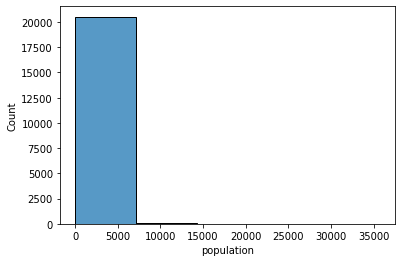

In [14]:
sns.histplot(df['population'], bins=5);

##Splitting the data

In [15]:

#length of data
n=len(df)
n

20640

In [16]:
#Splitting the data set

n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=int(n-(n_val+n_test))
n_val,n_test,n_train

(4128, 4128, 12384)

In [17]:

#shuffling the data set

idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [18]:
#Assigning data sets after splitting

df_train=df.iloc[idx[:n_train]]
df_val=df.iloc[idx[n_train:n_train+n_val]]
df_test=df.iloc[idx[n_train+n_val:]]

In [19]:
#retaining proper index after splitting

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [20]:
len(df_test), len(df_train),len(df_val)
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
12379,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327,461300.0
12380,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798,205800.0
12381,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530,146800.0
12382,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566,151800.0


In [21]:
df_val

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-120.85,37.51,15.0,1131.0,285.0,728.0,281.0,1.5531,93100.0
1,-118.25,34.09,52.0,1866.0,470.0,1211.0,417.0,2.9350,189400.0
2,-122.02,37.31,34.0,2629.0,433.0,1301.0,431.0,6.0830,341400.0
3,-121.88,37.30,16.0,2692.0,749.0,1674.0,681.0,2.6763,191100.0
4,-122.27,37.56,17.0,3211.0,847.0,1553.0,812.0,4.9434,292100.0
...,...,...,...,...,...,...,...,...,...
4123,-119.12,36.05,27.0,1575.0,321.0,1063.0,317.0,2.1477,53900.0
4124,-116.90,33.65,15.0,652.0,149.0,248.0,97.0,2.1071,93800.0
4125,-120.71,38.34,16.0,1257.0,231.0,559.0,213.0,4.4531,144300.0
4126,-117.13,32.91,16.0,2715.0,581.0,1619.0,584.0,4.0000,154700.0


In [22]:
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-120.26,37.13,33.0,1239.0,250.0,648.0,227.0,2.0278,58800.0
1,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732,165800.0
2,-118.36,34.04,48.0,1769.0,429.0,993.0,405.0,2.3214,139400.0
3,-118.15,34.69,32.0,1300.0,234.0,712.0,249.0,3.2500,107500.0
4,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806,107200.0
...,...,...,...,...,...,...,...,...,...
4123,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
4124,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
4125,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
4126,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


In [23]:
#changing large price figures to log

y_train=np.log1p(df_train['median_house_value'])
y_val=np.log1p(df_val['median_house_value'])
y_test=np.log1p(df_test['median_house_value'])

In [24]:
#removing out house cost from main data

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [25]:
df_val.shape,df.shape

((4128, 8), (20640, 9))

In [26]:
df_train.values

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [-1.2091e+02,  3.8980e+01,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [-1.1772e+02,  3.4090e+01,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [-1.2247e+02,  3.7760e+01,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [27]:
df_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [28]:
mean1=df_train['total_bedrooms'].mean()
median1=df_train['total_bedrooms'].median()

##Training linear regression

In [29]:
def train_linear_regression(x,y):
   ones=np.ones(x.shape[0])
   x=np.column_stack([ones,x])

   xTx=x.T.dot(x)
   xTx_inv=np.linalg.inv(xTx)
   w=xTx_inv.dot(x.T).dot(y)

   return w[0],w[1:]

In [30]:
def pre_x(data,fill):
    data = data.copy()
    data_num = data.fillna(fill)
    x = data_num.values
    return x

In [31]:
x_train0=pre_x(df_train,0)
x_val0=pre_x(df_val,0)
x_test0=pre_x(df_test,0)

In [32]:
x_train_mean=pre_x(df_train,mean1)
x_val_mean=pre_x(df_val,mean1)
x_test_mean=pre_x(df_test,mean1)

In [33]:
x_train_median=pre_x(df_train,median1)
x_val_median=pre_x(df_val,median1)
x_test_median=pre_x(df_test,median1)

In [34]:
#finding the rmse
def rmse(y,y_pred):
    error = y-y_pred
    se = error **2
    mse = se.mean()
    return np.sqrt(mse)

##Filling with zeron

In [35]:

##Getting w0 and w
w0,w=train_linear_regression(x_train0,y_train)
w0,w

(-11.686975242036546,
 array([-2.76255120e-01, -2.82087184e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

In [36]:
# Getting Y_pred By w0+x_train1*w
y_pred=w0+x_train0.dot(w)
y_pred

array([11.28055213, 11.90427911, 12.46507934, ..., 11.53259294,
       11.92377088, 12.54517195])

In [37]:
rmse(y_train,y_pred)

0.3413135910156676

##Comparing against Validation

In [38]:
#train_linear_regression(x_train0,y_train)
#pre_x(x_val0,0)


w0,w = train_linear_regression(x_train0, y_train)

y_pred = w0 + x_val0.dot(w)

score = rmse(y_val, y_pred)
score = round(score, 2)
score

0.33

##Filling with mean

In [39]:
w0,w = train_linear_regression(x_train_mean, y_train)

y_pred = w0 + x_val_mean.dot(w)

score = rmse(y_val, y_pred)
score = round(score, 2)
score

0.33

##Filling with a median

In [40]:
w0,w = train_linear_regression(x_train_median, y_train)

y_pred = w0 + x_val_median.dot(w)

score = rmse(y_val, y_pred)
score = round(score, 2)
score

0.33

In [41]:
np.allclose(x_train0, x_train_mean)

False

##Question 4

In [42]:
def prepare_x(df):
    df = df.copy()
    df_num = df.fillna(0)
    x = df_num.values
    return x

In [43]:
def train_linear_regression(x,y, r=0.001):
    
    ##adding a first column of ones
    ones = np.ones(x.shape[0])
    x = np.column_stack([ones,x])
    
    ### The below syntax (x.T)  means Transpose(X) * X
    ### Also known as the gram matrix
    xTx = x.T.dot(x)
    xTx = xTx + r * np.eye(xTx.shape[0])
    
    ##inverse of matrix
    xTx_inv = np.linalg.inv(xTx)
    
    # (XTX)^-1 * Transpose(X) * y
    w_full = xTx_inv.dot(x.T).dot(y)
    
    return w_full[0], w_full[1:]

In [44]:
def rmse(y,y_pred):
    error = y-y_pred
    se = error **2
    mse = se.mean()
    return round(np.sqrt(mse),2)

In [45]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    x_train = prepare_x(df_train)
    w0,w = train_linear_regression(x_train, y_train,r=r)

    x_val = prepare_x(df_val)
    y_pred = w0 + x_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print(r,w0,score)

0 -11.686975242036546 0.33
1e-06 -11.686959175728921 0.33
0.0001 -11.685368865034667 0.33
0.001 -11.670931317799797 0.33
0.01 -11.528493585632091 0.33
0.1 -10.274500282195673 0.33
1 -4.920480897742212 0.33
5 -1.482095745621172 0.34
10 -0.7899311831779245 0.34


5

In [58]:
def prepare_x(df):
    df = df.copy()
    df_num = df.fillna(0)
    x = df_num.values
    return x

In [47]:
def train_linear_regression(x,y, r=0.001):
    
    ##adding a first column of ones
    ones = np.ones(x.shape[0])
    x = np.column_stack([ones,x])
    
    ### The below syntax (x.T)  means Transpose(X) * X
    ### Also known as the gram matrix
    xTx = x.T.dot(x)
    
    ##inverse of matrix
    xTx_inv = np.linalg.inv(xTx)
    
    # (XTX)^-1 * Transpose(X) * y
    w_full = xTx_inv.dot(x.T).dot(y)
    
    return w_full[0], w_full[1:]

In [48]:
def rmse(y,y_pred):
    error = y-y_pred
    se = error **2
    mse = se.mean()
    return round(np.sqrt(mse),2)

In [49]:
# 60 , 20, 20 spread
n = len(df)

n_val= int(n*0.2)
n_test= int(n*0.2)
n_train = n-n_val-n_test

all_scores = []
idx = np.arange(n)
for seed in [0, 1, 2, 3, 4, 5, 6,7, 8, 9]:
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    y_train = np.log1p(df_train.median_house_value)
    y_val = np.log1p(df_val.median_house_value)
    y_test = np.log1p(df_test.median_house_value)

    del df_train["median_house_value"]
    del df_val["median_house_value"]
    del df_test["median_house_value"]
    
    x_train = prepare_x(df_train)
    w0,w = train_linear_regression(x_train, y_train)

    x_val = prepare_x(df_val)
    y_pred = w0 + x_val.dot(w)

    score = rmse(y_val, y_pred)
    all_scores.append(score)

    print(seed,w0,score)

0 -11.900382138125133 0.34
1 -11.97818041921342 0.34
2 -11.834483549948354 0.35
3 -11.503004940133511 0.34
4 -11.641797790993596 0.35
5 -11.847257947348531 0.34
6 -11.87451198326509 0.35
7 -11.351053922362084 0.34
8 -11.733632556109576 0.34
9 -11.746262434405908 0.34


In [50]:
all_scores

[0.34, 0.34, 0.35, 0.34, 0.35, 0.34, 0.35, 0.34, 0.34, 0.34]

In [51]:
std = np.std(all_scores)
round(std, 3)

0.005

6

In [52]:
def train_linear_regression(x,y, r=0.001):
    
    ##adding a first column of ones
    ones = np.ones(x.shape[0])
    x = np.column_stack([ones,x])
    
    ### The below syntax (x.T)  means Transpose(X) * X
    ### Also known as the gram matrix
    xTx = x.T.dot(x)
    xTx = xTx + r * np.eye(xTx.shape[0])
    
    ##inverse of matrix
    xTx_inv = np.linalg.inv(xTx)
    
    # (XTX)^-1 * Transpose(X) * y
    w_full = xTx_inv.dot(x.T).dot(y)
    
    return w_full[0], w_full[1:]

In [53]:
#doing a full train
df_full_train=pd.concat([df_train,df_val])
df_full_train=df_full_train.reset_index(drop=True)

x_full_train=prepare_x(df_full_train)
x_full_train

array([[-1.2225e+02,  3.8020e+01,  1.6000e+01, ...,  9.4600e+02,
         2.6600e+02,  5.7001e+00],
       [-1.1736e+02,  3.4480e+01,  3.0000e+00, ...,  7.5880e+03,
         2.2850e+03,  3.9792e+00],
       [-1.1763e+02,  3.3470e+01,  4.0000e+00, ...,  8.0500e+02,
         2.7100e+02,  7.6012e+00],
       ...,
       [-1.1935e+02,  3.6330e+01,  1.4000e+01, ...,  5.6800e+02,
         2.2900e+02,  3.1486e+00],
       [-1.2123e+02,  3.7870e+01,  4.9000e+01, ...,  5.9000e+01,
         2.6000e+01,  3.6500e+00],
       [-1.2060e+02,  3.7370e+01,  1.0000e+01, ...,  1.3680e+03,
         4.8700e+02,  4.6667e+00]])

In [54]:
y_full_train=pd.concat([y_train,y_val])

In [55]:
w0,w = train_linear_regression(x_full_train, y_full_train)
w0

-11.498881412358138

In [56]:
x_test=prepare_x(df_test)
y_pred = w0 + x_test.dot(w)

score = rmse(y_test, y_pred)
score

0.34

In [57]:
x_test0,x_test

(array([[-1.2026e+02,  3.7130e+01,  3.3000e+01, ...,  6.4800e+02,
          2.2700e+02,  2.0278e+00],
        [-1.1791e+02,  3.3860e+01,  2.6000e+01, ...,  1.4150e+03,
          5.2700e+02,  2.4732e+00],
        [-1.1836e+02,  3.4040e+01,  4.8000e+01, ...,  9.9300e+02,
          4.0500e+02,  2.3214e+00],
        ...,
        [-1.1838e+02,  3.4030e+01,  3.6000e+01, ...,  1.7560e+03,
          5.2700e+02,  2.9344e+00],
        [-1.2196e+02,  3.7580e+01,  1.5000e+01, ...,  1.7770e+03,
          5.5900e+02,  5.7192e+00],
        [-1.2242e+02,  3.7770e+01,  5.2000e+01, ...,  2.6190e+03,
          1.2420e+03,  2.5755e+00]]),
 array([[-122.36  ,   37.94  ,   26.    , ..., 1007.    ,  338.    ,
            1.3365],
        [-122.2   ,   37.84  ,   35.    , ..., 1072.    ,  443.    ,
            7.4882],
        [-118.11  ,   34.16  ,   52.    , ..., 1229.    ,  444.    ,
            5.4223],
        ...,
        [-119.27  ,   34.29  ,   32.    , ...,  982.    ,  393.    ,
            5.3254],
